In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import glob

# Set font sizes
SMALL_SIZE = 22     # For tick labels
MEDIUM_SIZE = 26    # For legend and axis labels
BIGGER_SIZE = 30    # For title

def create_comparison_graph(data):
    """Create ASR comparison visualization"""
    plt.figure(figsize=(15, 8))
    
    # Set font sizes for different elements
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=MEDIUM_SIZE)   # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    
    # Get unique ASR systems and calculate their average WERs
    asr_systems = data['ASR System'].unique()
    raw_wers = []
    improved_wers = []
    
    for asr in asr_systems:
        raw_wer = data[data['ASR System'] == asr]['Raw WER'].mean()
        improved_wer = data[data['ASR System'] == asr]['Improved WER'].mean()
        raw_wers.append(raw_wer)
        improved_wers.append(improved_wer)
    
    # Set up bar positions
    x = np.arange(len(asr_systems))
    width = 0.35
    
    # Create bars
    plt.bar(x - width/2, raw_wers, width, label='Raw ASR', alpha=0.8)
    plt.bar(x + width/2, improved_wers, width, label='Improved', alpha=0.8)
    
    # Customize the plot
    plt.xlabel('ASR System', fontsize=MEDIUM_SIZE, fontweight='bold')
    plt.ylabel('Word Error Rate (WER)', fontsize=MEDIUM_SIZE, fontweight='bold')
    plt.title('ASR System Performance Comparison', fontsize=BIGGER_SIZE, fontweight='bold', pad=20)
    plt.xticks(x, asr_systems, fontsize=SMALL_SIZE, rotation=45, ha='right')
    plt.yticks(fontsize=SMALL_SIZE)
    
    # Add legend with larger font
    plt.legend(fontsize=MEDIUM_SIZE, loc='upper right')
    
    # Add grid
    plt.grid(True, alpha=0.3)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Show the plot
    plt.show()

def print_summary_table(data):
    """Print a summary table of ASR performance metrics"""
    # Calculate summary statistics for each ASR system
    summary = {}
    for asr in data['ASR System'].unique():
        asr_data = data[data['ASR System'] == asr]
        raw_wer = asr_data['Raw WER'].mean()
        improved_wer = data[data['ASR System'] == asr]['Improved WER'].mean()
        improvement = ((raw_wer - improved_wer) / raw_wer) * 100
        
        summary[asr] = {
            'Raw WER': raw_wer,
            'Improved WER': improved_wer,
            'Improvement %': improvement
        }
    
    # Print the table with larger font (using more spacing)
    print(f"{'ASR System':<25} {'Raw WER':>15} {'Improved WER':>20} {'Improvement %':>20}")
    print("-" * 80)
    
    for asr, metrics in summary.items():
        print(f"{asr:<25} {metrics['Raw WER']:>15.3f} {metrics['Improved WER']:>20.3f} {metrics['Improvement %']:>19.1f}%")


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import glob

# Set font sizes
SMALL_SIZE = 22    # For tick labels and legend
MEDIUM_SIZE = 23   # For axis labels
BIGGER_SIZE = 24   # For title


In [118]:
def create_comparison_graph(data):
    """Create ASR comparison visualization"""
    plt.figure(figsize=(15, 8))
    
    # Set font sizes for different elements
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    
    # Get unique ASR systems and calculate their average WERs
    asr_systems = data['ASR System'].unique()
    raw_wers = []
    improved_wers = []
    
    for asr in asr_systems:
        raw_wer = data[data['ASR System'] == asr]['Raw WER'].mean()
        improved_wer = data[data['ASR System'] == asr]['Improved WER'].mean()
        raw_wers.append(raw_wer)
        improved_wers.append(improved_wer)
    
    # Set up bar positions
    x = np.arange(len(asr_systems))
    width = 0.35
    
    # Create bars
    plt.bar(x - width/2, raw_wers, width, label='Raw ASR', alpha=0.8)
    plt.bar(x + width/2, improved_wers, width, label='Improved', alpha=0.8)
    
    # Customize the plot
    plt.xlabel('ASR System', fontsize=MEDIUM_SIZE, fontweight='bold')
    plt.ylabel('Word Error Rate (WER)', fontsize=MEDIUM_SIZE, fontweight='bold')
    plt.title('ASR System Performance Comparison', fontsize=BIGGER_SIZE, fontweight='bold', pad=20)
    plt.xticks(x, asr_systems, fontsize=SMALL_SIZE, rotation=45, ha='right')
    plt.yticks(fontsize=SMALL_SIZE)
    
    # Add legend with larger font
    plt.legend(fontsize=SMALL_SIZE)
    
    # Add grid
    plt.grid(True, alpha=0.3)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Show the plot
    plt.show()


In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import glob

# Set font sizes
SMALL_SIZE = 22    # For tick labels and legend
MEDIUM_SIZE = 23   # For axis labels
BIGGER_SIZE = 24   # For title

def collect_asr_data():
    """Collect ASR performance data from evaluation metrics files"""
    data = []
    
    # Get all evaluation_metrics.csv files
    for metrics_file in glob.glob('outputsnew/**/evaluation_metrics.csv', recursive=True):
        try:
            df = pd.read_csv(metrics_file)
            
            # Extract ASR system and other info from path
            path_parts = Path(metrics_file).parts
            asr_system = path_parts[1]  # outputsnew/ASR_SYSTEM/...
            
            # Get WER values
            raw_wer = df[df['Type'] == 'Raw ASR']['WER'].iloc[0]
            improved_wer = df[df['Type'] == 'Improved']['WER'].iloc[0]
            
            data.append({
                'ASR System': asr_system,
                'Raw WER': raw_wer,
                'Improved WER': improved_wer
            })
            
        except Exception as e:
            print(f"Error processing {metrics_file}: {e}")
            continue
    
    if data:
        return pd.DataFrame(data)
    return None

def create_comparison_graph(data):
    """Create ASR comparison visualization"""
    plt.figure(figsize=(15, 8))
    
    # Set font sizes for different elements
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    
    # Get unique ASR systems and calculate their average WERs
    asr_systems = data['ASR System'].unique()
    raw_wers = []
    improved_wers = []
    
    for asr in asr_systems:
        raw_wer = data[data['ASR System'] == asr]['Raw WER'].mean()
        improved_wer = data[data['ASR System'] == asr]['Improved WER'].mean()
        raw_wers.append(raw_wer)
        improved_wers.append(improved_wer)
    
    # Set up bar positions
    x = np.arange(len(asr_systems))
    width = 0.35
    
    # Create bars
    plt.bar(x - width/2, raw_wers, width, label='Raw ASR', alpha=0.8)
    plt.bar(x + width/2, improved_wers, width, label='Improved', alpha=0.8)
    
    # Customize the plot
    plt.xlabel('ASR System', fontsize=MEDIUM_SIZE, fontweight='bold')
    plt.ylabel('Word Error Rate (WER)', fontsize=MEDIUM_SIZE, fontweight='bold')
    plt.title('ASR System Performance Comparison', fontsize=BIGGER_SIZE, fontweight='bold', pad=20)
    plt.xticks(x, asr_systems, fontsize=SMALL_SIZE, rotation=45, ha='right')
    plt.yticks(fontsize=SMALL_SIZE)
    
    # Add legend with larger font
    plt.legend(fontsize=SMALL_SIZE)
    
    # Add grid
    plt.grid(True, alpha=0.3)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Show the plot
    plt.show()

def print_summary_table(data):
    """Print a summary table of ASR performance metrics"""
    # Calculate summary statistics for each ASR system
    summary = {}
    for asr in data['ASR System'].unique():
        asr_data = data[data['ASR System'] == asr]
        raw_wer = asr_data['Raw WER'].mean()
        improved_wer = data[data['ASR System'] == asr]['Improved WER'].mean()
        improvement = ((raw_wer - improved_wer) / raw_wer) * 100
        
        summary[asr] = {
            'Raw WER': raw_wer,
            'Improved WER': improved_wer,
            'Improvement %': improvement
        }
    
    # Print the table with larger font (using more spacing)
    print(f"{'ASR System':<20} {'Raw WER':>15} {'Improved WER':>20} {'Improvement %':>20}")
    print("-" * 75)
    
    for asr, metrics in summary.items():
        print(f"{asr:<20} {metrics['Raw WER']:>15.3f} {metrics['Improved WER']:>20.3f} {metrics['Improvement %']:>19.1f}%")


In [ ]:
def print_summary_table(data):
    """Print a summary table of ASR performance metrics"""
    # Calculate summary statistics for each ASR system
    summary = {}
    for asr in data['ASR System'].unique():
        asr_data = data[data['ASR System'] == asr]
        raw_wer = asr_data['Raw WER'].mean()
        improved_wer = asr_data['Improved WER'].mean()
        improvement = ((raw_wer - improved_wer) / raw_wer) * 100
        
        summary[asr] = {
            'Raw WER': raw_wer,
            'Improved WER': improved_wer,
            'Improvement %': improvement
        }
    
    # Print the table
    print(f"{'ASR System':<15} {'Raw WER':>10} {'Improved WER':>15} {'Improvement %':>15}")
    print("-" * 55)
    
    for asr, metrics in summary.items():
        print(f"{asr:<15} {metrics['Raw WER']:>10.3f} {metrics['Improved WER']:>15.3f} {metrics['Improvement %']:>14.1f}%")


: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob

# Define the ASR systems and strategies we want to analyze
asr_systems = ['GCP', 'ElevenLabs', 'Gemini', 'AWS']
strategies = ['random_error', 'exhaustive_phoneme', 'data_driven']

# Function to get WER scores from evaluation metrics files
def get_wer_scores(asr_system, strategy):
    # Find the most recent run folder for this strategy
    base_path = Path(f'outputsnew/{asr_system}/{strategy}')
    run_folders = list(base_path.glob('*_run1'))
    if not run_folders:
        return None, None
    
    latest_run = max(run_folders)
    
    # Get all evaluation_metrics.csv files
    metrics_files = list(latest_run.glob('*/*/evaluation_metrics.csv'))
    
    raw_wers = []
    improved_wers = []
    
    for file in metrics_files:
        try:
            df = pd.read_csv(file)
            raw_wer = df[df['Type'] == 'Raw ASR']['WER'].iloc[0]
            improved_wer = df[df['Type'] == 'Improved']['WER'].iloc[0]
            raw_wers.append(raw_wer)
            improved_wers.append(improved_wer)
        except:
            continue
    
    if raw_wers and improved_wers:
        return np.mean(raw_wers), np.mean(improved_wers)
    return None, None

# Collect data for plotting
plot_data = []
for strategy in strategies:
    for asr in asr_systems:
        raw_wer, improved_wer = get_wer_scores(asr, strategy)
        if raw_wer is not None and improved_wer is not None:
            plot_data.append({
                'Strategy': strategy,
                'ASR': asr,
                'Type': 'Raw ASR',
                'WER': raw_wer
            })
            plot_data.append({
                'Strategy': strategy,
                'ASR': asr,
                'Type': 'Improved',
                'WER': improved_wer
            })

# Create DataFrame
df_plot = pd.DataFrame(plot_data)

# Set up the plot
plt.figure(figsize=(15, 8))
bar_width = 0.1
opacity = 0.8
group_width = bar_width * 2 * len(asrs)  # Width of entire group of bars

# Calculate positions for bars and labels
strategies_pos = np.arange(len(strategies)) * (group_width + 0.4)  # Add space between groups
asrs = asr_systems

# Plot bars and calculate averages for each strategy
for idx, asr in enumerate(asrs):
    # Raw ASR bars
    raw_data = df_plot[(df_plot['ASR'] == asr) & (df_plot['Type'] == 'Raw ASR')]
    plt.bar(strategies_pos + idx*bar_width*2, 
            raw_data['WER'],
            bar_width,
            alpha=opacity,
            color=f'C{idx}',
            label=f'{asr} Raw')
    
    # Improved bars
    improved_data = df_plot[(df_plot['ASR'] == asr) & (df_plot['Type'] == 'Improved')]
    plt.bar(strategies_pos + idx*bar_width*2 + bar_width,
            improved_data['WER'],
            bar_width,
            alpha=opacity,
            color=f'C{idx}',
            label=f'{asr} Improved')

# Add average lines for each strategy
for strategy_idx, strategy in enumerate(strategies):
    # Calculate average for Raw ASR
    raw_avg = df_plot[(df_plot['Strategy'] == strategy) & 
                      (df_plot['Type'] == 'Raw ASR')]['WER'].mean()
    
    # Calculate average for Improved
    improved_avg = df_plot[(df_plot['Strategy'] == strategy) & 
                          (df_plot['Type'] == 'Improved')]['WER'].mean()
    
    # Plot average lines
    x_start = strategies_pos[strategy_idx] - bar_width
    x_end = strategies_pos[strategy_idx] + group_width - bar_width
    
    # Raw average (dashed line)
    plt.hlines(y=raw_avg, xmin=x_start, xmax=x_end, 
              colors='red', linestyles='--', 
              label='Raw Average' if strategy_idx == 0 else "")
    
    # Improved average (solid line)
    plt.hlines(y=improved_avg, xmin=x_start, xmax=x_end, 
              colors='blue', linestyles='-', 
              label='Improved Average' if strategy_idx == 0 else "")

# Set font sizes
SMALL_SIZE = 22    # For tick labels and legend
MEDIUM_SIZE = 23   # For axis labels
BIGGER_SIZE = 24   # For title

# Set font sizes for different elements
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Customize the plot
plt.xlabel('Strategy', fontsize=MEDIUM_SIZE, fontweight='bold')
plt.ylabel('Word Error Rate (WER)', fontsize=MEDIUM_SIZE, fontweight='bold')
plt.title('ASR Performance Comparison Across Strategies', fontsize=BIGGER_SIZE, fontweight='bold', pad=20)

# Center x-axis labels under each group
plt.xticks(strategies_pos + group_width/2 - bar_width, strategies, fontsize=SMALL_SIZE)
plt.yticks(fontsize=SMALL_SIZE)

# Add legend with larger font
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=SMALL_SIZE)
plt.grid(True, alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Set font sizes
SMALL_SIZE = 22    # For tick labels and legend
MEDIUM_SIZE = 23   # For axis labels
BIGGER_SIZE = 24   # For title

# Create ASR comparison chart
plt.figure(figsize=(15, 8))

# Set font sizes for different elements
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Get unique ASR systems and calculate their average WERs
asr_systems = df['ASR System'].unique()
raw_wers = []
improved_wers = []

for asr in asr_systems:
    raw_wer = df[df['ASR System'] == asr]['Raw WER'].mean()
    improved_wer = df[df['ASR System'] == asr]['Improved WER'].mean()
    raw_wers.append(raw_wer)
    improved_wers.append(improved_wer)

# Set up bar positions
x = np.arange(len(asr_systems))
width = 0.35

# Create bars
plt.bar(x - width/2, raw_wers, width, label='Raw ASR', alpha=0.8)
plt.bar(x + width/2, improved_wers, width, label='Improved', alpha=0.8)

# Customize the plot
plt.xlabel('ASR System', fontsize=MEDIUM_SIZE, fontweight='bold')
plt.ylabel('Word Error Rate (WER)', fontsize=MEDIUM_SIZE, fontweight='bold')
plt.title('ASR System Performance Comparison', fontsize=BIGGER_SIZE, fontweight='bold', pad=20)
plt.xticks(x, asr_systems, fontsize=SMALL_SIZE, rotation=45, ha='right')
plt.yticks(fontsize=SMALL_SIZE)

# Add legend with larger font
plt.legend(fontsize=SMALL_SIZE)

# Add grid
plt.grid(True, alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()


NameError: name 'df' is not defined

<Figure size 1500x800 with 0 Axes>

# ASR System Performance Analysis

This notebook analyzes and visualizes the performance comparison between raw and improved ASR outputs across different systems.


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Set the style
sns.set_style("whitegrid")
sns.set_context("notebook")
sns.set_palette("husl")

# Additional matplotlib customization
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3


In [ ]:
def collect_metrics_data():
    """Collect WER values from evaluation_metrics.csv files in outputsnew directory."""
    data = {}
    outputsnew_dir = 'outputsnew'
    
    if not os.path.exists(outputsnew_dir):
        print(f"Directory '{outputsnew_dir}' not found!")
        return data
    
    # Get all ASR systems from outputsnew directory
    asr_systems = [d for d in os.listdir(outputsnew_dir) 
                  if os.path.isdir(os.path.join(outputsnew_dir, d))]
    
    for system in asr_systems:
        data[system] = {'raw': [], 'improved': []}
        base_path = os.path.join(outputsnew_dir, system)
        
        # Walk through all evaluation_metrics.csv files
        for root, dirs, files in os.walk(base_path):
            if 'evaluation_metrics.csv' in files:
                metrics_file = os.path.join(root, 'evaluation_metrics.csv')
                try:
                    df = pd.read_csv(metrics_file)
                    raw_wer = df[df['Type'] == 'Raw ASR']['WER'].values[0]
                    improved_wer = df[df['Type'] == 'Improved']['WER'].values[0]
                    
                    # Convert to percentage
                    data[system]['raw'].append(raw_wer * 100)
                    data[system]['improved'].append(improved_wer * 100)
                except Exception as e:
                    print(f"Error reading {metrics_file}: {e}")
    
    print(f"Found data for {len(data)} ASR systems")
    return data


In [ ]:
def collect_metrics_by_sentences():
    """Collect WER values by number of sentences from outputsnew directory."""
    data = {'raw': {}, 'improved': {}}
    outputsnew_dir = 'outputsnew'
    
    if not os.path.exists(outputsnew_dir):
        return data
    
    # Walk through all evaluation_metrics.csv files
    for root, dirs, files in os.walk(outputsnew_dir):
        if 'evaluation_metrics.csv' in files:
            # Extract number of sentences from path
            path_parts = root.split(os.sep)
            for part in path_parts:
                if part.endswith('_sentences'):
                    num_sentences = int(part.split('_')[0])
                    metrics_file = os.path.join(root, 'evaluation_metrics.csv')
                    try:
                        df = pd.read_csv(metrics_file)
                        raw_wer = df[df['Type'] == 'Raw ASR']['WER'].values[0]
                        improved_wer = df[df['Type'] == 'Improved']['WER'].values[0]
                        
                        # Convert to percentage and store
                        if num_sentences not in data['raw']:
                            data['raw'][num_sentences] = []
                            data['improved'][num_sentences] = []
                        
                        data['raw'][num_sentences].append(raw_wer * 100)
                        data['improved'][num_sentences].append(improved_wer * 100)
                    except Exception as e:
                        print(f"Error reading {metrics_file}: {e}")
    
    return data


In [ ]:
def create_comparison_graph(data):
    """Create a simple bar graph comparing ASR systems."""
    if not data:
        print("No data available")
        return
    
    # Prepare data
    systems = []
    raw_values = []
    improved_values = []
    
    for system in sorted(data.keys()):
        systems.append(system)
        raw_values.append(np.mean(data[system]['raw']))
        improved_values.append(np.mean(data[system]['improved']))
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # Set up bar positions
    x = np.arange(len(systems))
    width = 0.35
    
    # Create bars
    raw_bars = ax.bar(x - width/2, raw_values, width, label='Raw ASR', color='#4B77BE')
    improved_bars = ax.bar(x + width/2, improved_values, width, label='Improved', color='#89C4F4')
    
    # Add value labels on top of bars
    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height,
                   f'{int(round(height))}',
                   ha='center', va='bottom', fontsize=14, fontweight='bold')
    
    autolabel(raw_bars)
    autolabel(improved_bars)
    
    # Add mean lines
    mean_raw = np.mean(raw_values)
    mean_improved = np.mean(improved_values)
    
    # Raw ASR mean line (red)
    ax.axhline(y=mean_raw, color='red', linestyle='--', alpha=0.7)
    ax.text(len(systems)-1, mean_raw, f'{int(round(mean_raw))}',
            ha='right', va='bottom', color='red', fontsize=14, fontweight='bold')
    
    # Improved mean line (green)
    ax.axhline(y=mean_improved, color='green', linestyle='--', alpha=0.7)
    ax.text(len(systems)-1, mean_improved, f'{int(round(mean_improved))}',
            ha='right', va='bottom', color='green', fontsize=14, fontweight='bold')
    
    # Customize the plot
    ax.set_ylabel('WER', fontsize=16, fontweight='bold')
    ax.set_xlabel('ASR System', fontsize=16, fontweight='bold')
    ax.set_title('ASR System Performance Comparison', fontsize=18, fontweight='bold', pad=20)
    
    # Set ticks
    ax.set_xticks(x)
    ax.set_xticklabels(systems, rotation=45, ha='right', fontsize=14)
    ax.tick_params(axis='y', labelsize=14)
    
    # Set y-axis to start at 0 and end at 60
    ax.set_ylim(0, 60)
    
    # Add grid only on y-axis
    ax.yaxis.grid(True, alpha=0.3)
    ax.set_axisbelow(True)
    
    # Add legend with larger font
    ax.legend(fontsize=14, loc='upper right')
    
    # Adjust layout
    plt.tight_layout()
    
    # Save and show
    plt.savefig('asr_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()


In [ ]:
def create_wer_by_sentences_graph(data):
    """Create a line graph showing WER performance across different numbers of sentences."""
    if not data:
        print("No data available")
        return
    
    # Create figure
    plt.figure(figsize=(12, 8))
    
    # Get sorted sentence counts
    sentence_counts = sorted(data['raw'].keys())
    
    # Calculate means for each number of sentences
    raw_means = [np.mean(data['raw'][n]) for n in sentence_counts]
    improved_means = [np.mean(data['improved'][n]) for n in sentence_counts]
    
    # Create line plot
    plt.plot(sentence_counts, raw_means, 'r--', marker='o', label='Raw ASR', linewidth=2, markersize=10)
    plt.plot(sentence_counts, improved_means, 'r-', marker='o', label='Improved', linewidth=2, markersize=10)
    
    # Add value labels on points
    for i, (raw, imp) in enumerate(zip(raw_means, improved_means)):
        plt.text(sentence_counts[i], raw, f'{raw:.1f}', 
                ha='center', va='bottom', fontsize=14, fontweight='bold')
        plt.text(sentence_counts[i], imp, f'{imp:.1f}', 
                ha='center', va='bottom', fontsize=14, fontweight='bold')
    
    # Customize the plot
    plt.xlabel('Number of Example Sentences', fontsize=16, fontweight='bold')
    plt.ylabel('WER (Score Lower Better)', fontsize=16, fontweight='bold')
    plt.title('Average WER vs. # Sentences (Aggregated Across All Samples)', 
             fontsize=18, fontweight='bold', pad=20)
    
    # Set axis ticks
    plt.xticks(sentence_counts, fontsize=14)
    plt.yticks(fontsize=14)
    
    # Set y-axis limits
    max_wer = max(max(raw_means), max(improved_means))
    plt.ylim(0, max_wer * 1.2)
    
    # Add grid
    plt.grid(True, alpha=0.3)
    
    # Add legend with larger font
    plt.legend(fontsize=14, loc='upper right')
    
    # Adjust layout and save
    plt.tight_layout()
    plt.savefig('wer_by_sentences.png', dpi=300, bbox_inches='tight')
    plt.show()


In [ ]:
def collect_wer_by_sentences(strategy):
    """Collect WER values for different numbers of sentences."""
    wer_by_sentences = {'raw': {}, 'improved': {}}
    base_path = os.path.join('outputs', strategy)
    
    if not os.path.exists(base_path):
        print(f"Strategy directory '{base_path}' not found!")
        return wer_by_sentences
    
    # Walk through all evaluation_metrics.csv files
    for root, dirs, files in os.walk(base_path):
        if 'evaluation_metrics.csv' in files:
            # Extract number of sentences from path
            path_parts = root.split(os.sep)
            for part in path_parts:
                if part.endswith('_sentences'):
                    num_sentences = int(part.split('_')[0])
                    metrics_file = os.path.join(root, 'evaluation_metrics.csv')
                    try:
                        df = pd.read_csv(metrics_file)
                        raw_wer = df[df['Type'] == 'Raw ASR']['WER'].values[0]
                        improved_wer = df[df['Type'] == 'Improved']['WER'].values[0]
                        
                        # Convert to percentage and store
                        if num_sentences not in wer_by_sentences['raw']:
                            wer_by_sentences['raw'][num_sentences] = []
                            wer_by_sentences['improved'][num_sentences] = []
                        
                        wer_by_sentences['raw'][num_sentences].append(raw_wer * 100)
                        wer_by_sentences['improved'][num_sentences].append(improved_wer * 100)
                    except Exception as e:
                        print(f"Error reading {metrics_file}: {e}")
    
    return wer_by_sentences


In [ ]:
def create_wer_by_sentences_graph(data):
    """Create a line graph showing WER performance across different numbers of sentences."""
    if not data:
        print("No data available")
        return
    
    # Create figure
    plt.figure(figsize=(10, 6))
    
    # Get sorted sentence counts
    sentence_counts = sorted(data['raw'].keys())
    
    # Calculate means for each number of sentences
    raw_means = [np.mean(data['raw'][n]) for n in sentence_counts]
    improved_means = [np.mean(data['improved'][n]) for n in sentence_counts]
    
    # Create line plot
    plt.plot(sentence_counts, raw_means, 'r--', marker='o', label='Raw ASR', linewidth=2)
    plt.plot(sentence_counts, improved_means, 'r-', marker='o', label='Improved', linewidth=2)
    
    # Customize the plot
    plt.xlabel('Number of Example Sentences')
    plt.ylabel('WER (Score Lower Better)')
    plt.title('Average WER vs. # Sentences (Aggregated Across All Samples)')
    
    # Set y-axis limits
    max_wer = max(max(raw_means), max(improved_means))
    plt.ylim(0, max_wer * 1.2)
    
    # Add grid
    plt.grid(True, alpha=0.3)
    
    # Add legend
    plt.legend()
    
    # Adjust layout and save
    plt.tight_layout()
    plt.savefig('wer_by_sentences.png', dpi=300, bbox_inches='tight')
    plt.show()


In [ ]:
def collect_wer_from_metrics(asr_system):
    """Collect WER values from evaluation_metrics.csv files."""
    wer_values = {'raw': [], 'improved': []}
    base_path = os.path.join('outputsnew', asr_system)
    
    if not os.path.exists(base_path):
        return wer_values
        
    # Walk through all evaluation_metrics.csv files
    for root, dirs, files in os.walk(base_path):
        if 'evaluation_metrics.csv' in files:
            metrics_file = os.path.join(root, 'evaluation_metrics.csv')
            try:
                df = pd.read_csv(metrics_file)
                raw_wer = df[df['Type'] == 'Raw ASR']['WER'].values[0]
                improved_wer = df[df['Type'] == 'Improved']['WER'].values[0]
                
                # Convert to percentage
                wer_values['raw'].append(raw_wer * 100)
                wer_values['improved'].append(improved_wer * 100)
            except Exception as e:
                print(f"Error reading {metrics_file}: {e}")
                
    return wer_values


Found data for 10 ASR systems


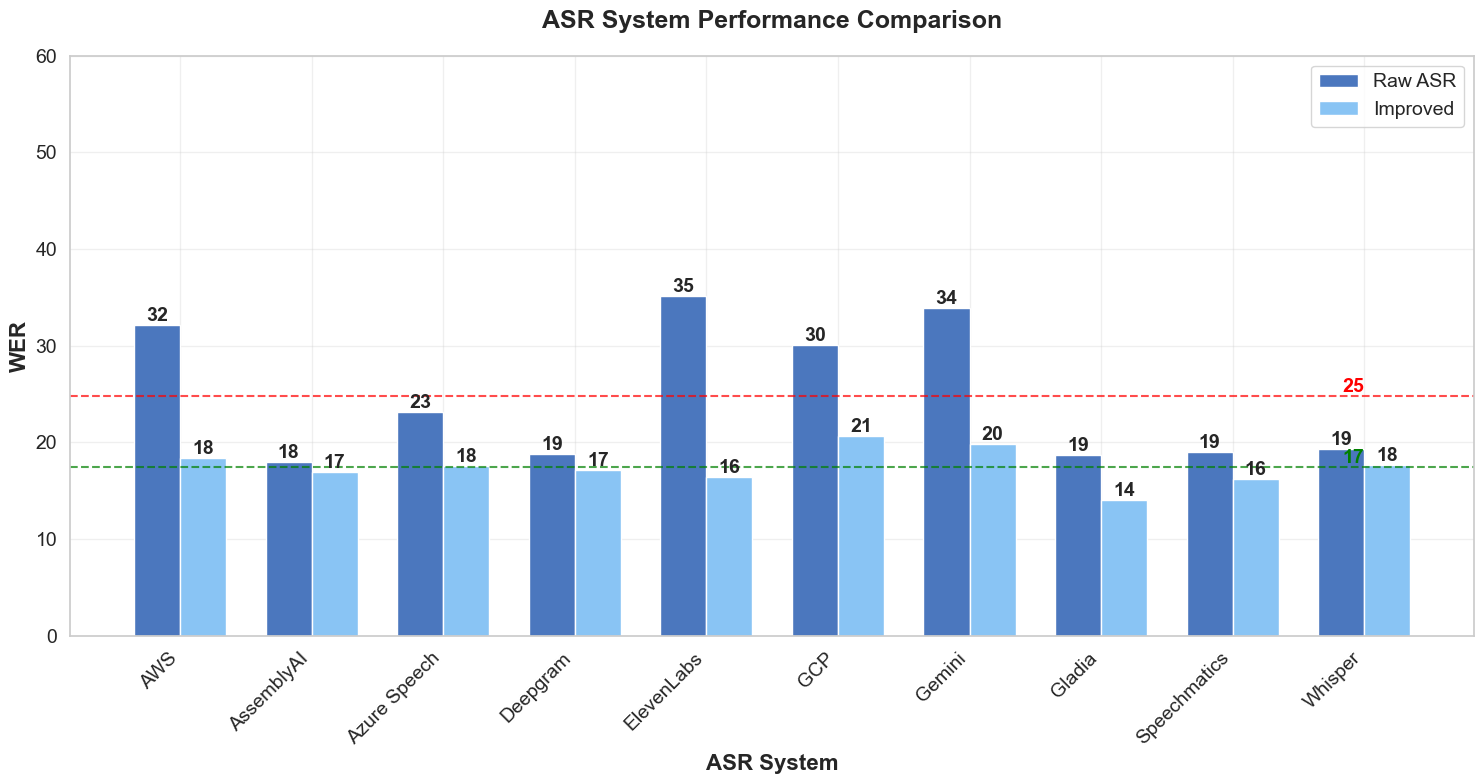


ASR PERFORMANCE SUMMARY


KeyError: 'ASR System'

In [ ]:
# Collect and analyze data
print("Collecting ASR performance data...")
data = collect_metrics_data()

if data:
    # Create bar graph visualization
    create_comparison_graph(data)
    
    # Display summary table
    print("\nASR PERFORMANCE SUMMARY")
    print("=" * 50)
    print_summary_table(data)
    
    # Create WER by sentences graph
    print("\nAnalyzing WER by number of sentences...")
    sentence_data = collect_metrics_by_sentences()
    if sentence_data['raw']:
        create_wer_by_sentences_graph(sentence_data)
else:
    print("No ASR performance data found. Please check your outputsnew directory.")


In [ ]:
def collect_asr_data():
    """Collect ASR performance data from evaluation metrics files."""
    print("Collecting ASR performance data...")
    
    data = {}
    outputsnew_dir = 'outputsnew'
    
    if not os.path.exists(outputsnew_dir):
        print(f"Directory '{outputsnew_dir}' not found!")
        return data
    
    # Get all ASR systems from outputsnew directory
    asr_systems = [d for d in os.listdir(outputsnew_dir) 
                  if os.path.isdir(os.path.join(outputsnew_dir, d))]
    
    # Collect data for each ASR system
    for system in asr_systems:
        wer_values = collect_wer_from_metrics(system)
        if wer_values['raw'] and wer_values['improved']:  # Only add if we have data
            data[system] = wer_values
    
    print(f"Found data for {len(data)} ASR systems")
    return data


In [ ]:
def create_comparison_graph(data):
    """Create a simple bar graph comparing ASR systems."""
    if not data:
        print("No data available")
        return
    
    # Prepare data
    systems = []
    raw_values = []
    improved_values = []
    
    for system in sorted(data.keys()):
        systems.append(system)
        raw_values.append(np.mean(data[system]['raw']))
        improved_values.append(np.mean(data[system]['improved']))
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Set up bar positions
    x = np.arange(len(systems))
    width = 0.35
    
    # Create bars
    raw_bars = ax.bar(x - width/2, raw_values, width, label='Raw ASR', color='#4B77BE')
    improved_bars = ax.bar(x + width/2, improved_values, width, label='Improved', color='#89C4F4')
    
    # Add value labels on top of bars
    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height,
                   f'{int(round(height))}',
                   ha='center', va='bottom', fontsize=24, fontweight='bold')
    
    autolabel(raw_bars)
    autolabel(improved_bars)
    
    # Add mean lines
    mean_raw = np.mean(raw_values)
    mean_improved = np.mean(improved_values)
    
    # Raw ASR mean line (red)
    ax.axhline(y=mean_raw, color='red', linestyle='--', alpha=0.7)
    ax.text(len(systems)-1, mean_raw, f'{int(round(mean_raw))}',
            ha='right', va='bottom', color='red')
    
    # Improved mean line (green)
    ax.axhline(y=mean_improved, color='green', linestyle='--', alpha=0.7)
    ax.text(len(systems)-1, mean_improved, f'{int(round(mean_improved))}',
            ha='right', va='bottom', color='green')
    
    # Customize the plot
    ax.set_ylabel('WER')
    ax.set_xticks(x)
    ax.set_xticklabels(systems, rotation=45, ha='right')
    
    # Set y-axis to start at 0 and end at 60
    ax.set_ylim(0, 60)
    
    # Add grid only on y-axis
    ax.yaxis.grid(True, alpha=0.3)
    ax.set_axisbelow(True)
    
    # Add legend
    ax.legend()
    
    # Adjust layout
    plt.tight_layout()
    
    # Save and show
    plt.savefig('asr_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()


Found data for 10 ASR systems


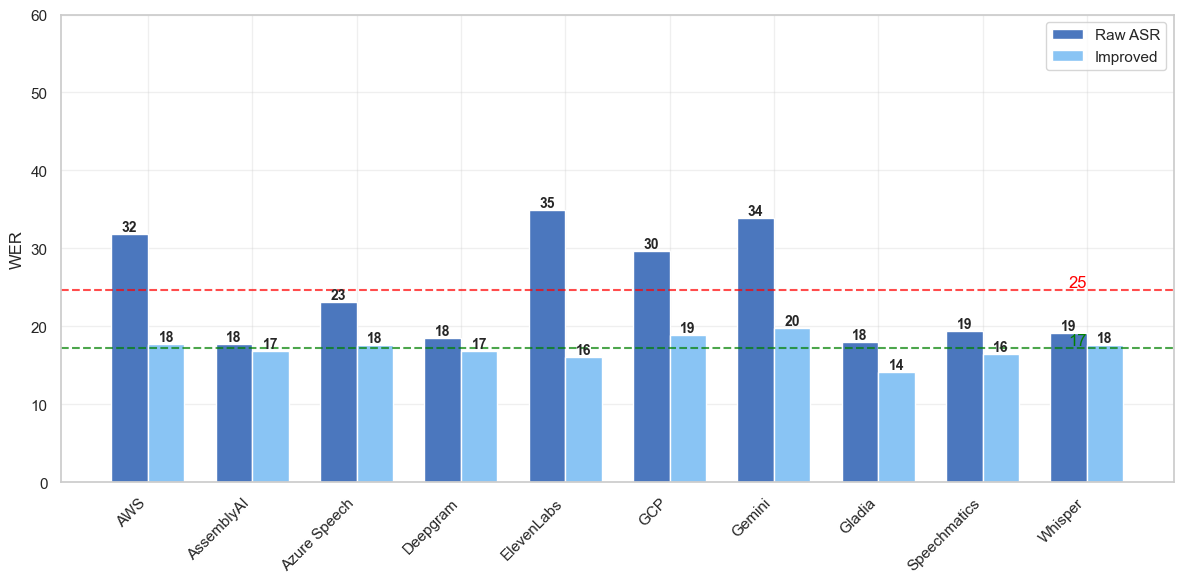


ASR PERFORMANCE SUMMARY


,ASR System,Raw WER (%),Improved WER (%),Improvement (%)
0,AWS,31.82,17.66,44.51
1,AssemblyAI,17.74,16.76,5.52
2,Azure Speech,23.10,17.54,24.09
3,Deepgram,18.50,16.87,8.80
4,ElevenLabs,34.90,16.07,53.94
5,GCP,29.65,18.92,36.19
6,Gemini,33.86,19.79,41.53
7,Gladia,18.04,14.09,21.89
8,Speechmatics,19.37,16.45,15.06
9,Whisper,19.20,17.62,8.19



Analyzing AssemblyAI...


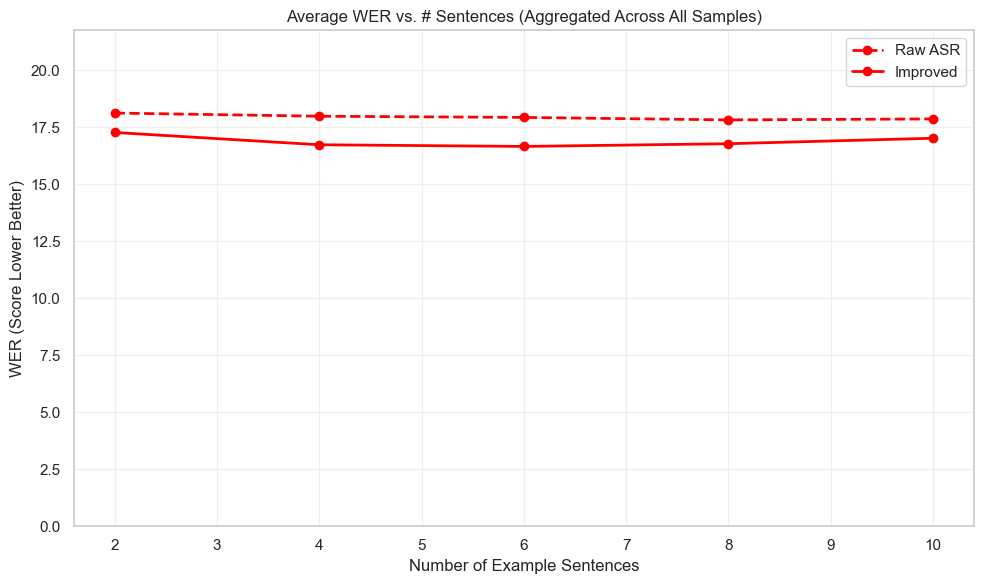

In [ ]:
# Collect and analyze data
data = collect_asr_data()

if data:
    # Create bar graph visualization
    create_comparison_graph(data)
    
    # Display summary table
    print("\nASR PERFORMANCE SUMMARY")
    print("=" * 50)
    print_summary_table(data)
    
    # Create WER by sentences graph for each ASR system
    for system in data.keys():
        print(f"\nAnalyzing {system}...")
        sentence_data = collect_wer_by_sentences(system)
        if sentence_data['raw']:
            create_wer_by_sentences_graph(sentence_data)
            break  # Just show one system for now
else:
    print("No ASR performance data found. Please check your ASR Hypotheses directory.")


In [ ]:
def print_summary_table(data):
    """Create and display a summary table using pandas styling."""
    summary_data = []
    
    for system in sorted(data.keys()):
        raw_mean = np.mean(data[system]['raw'])
        imp_mean = np.mean(data[system]['improved'])
        improvement = ((raw_mean - imp_mean) / raw_mean) * 100
        
        summary_data.append({
            'ASR System': system,
            'Raw WER (%)': raw_mean,
            'Improved WER (%)': imp_mean,
            'Improvement (%)': improvement
        })
    
    df = pd.DataFrame(summary_data)
    
    # Apply styling
    styled_df = df.style\
        .format(precision=2)\
        .background_gradient(cmap='RdYlGn_r', subset=['Raw WER (%)'])\
        .background_gradient(cmap='RdYlGn_r', subset=['Improved WER (%)'])\
        .background_gradient(cmap='RdYlGn', subset=['Improvement (%)'])
    
    display(styled_df)


## Run the Analysis


Found data for 10 ASR systems


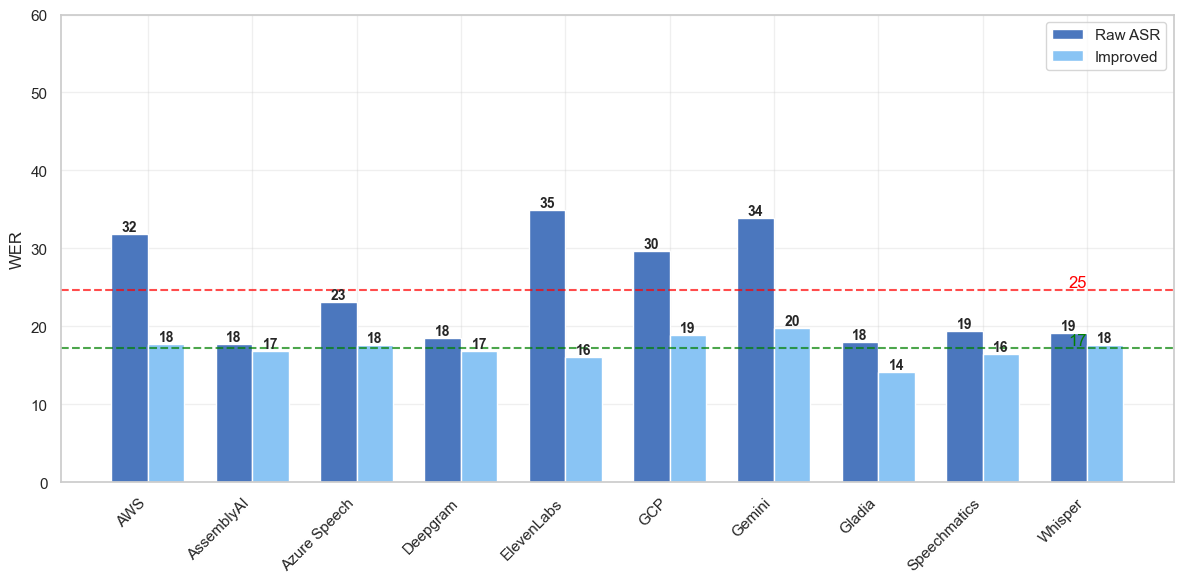


ASR PERFORMANCE SUMMARY


,ASR System,Raw WER (%),Improved WER (%),Improvement (%)
0,AWS,31.82,17.66,44.51
1,AssemblyAI,17.74,16.76,5.52
2,Azure Speech,23.10,17.54,24.09
3,Deepgram,18.50,16.87,8.80
4,ElevenLabs,34.90,16.07,53.94
5,GCP,29.65,18.92,36.19
6,Gemini,33.86,19.79,41.53
7,Gladia,18.04,14.09,21.89
8,Speechmatics,19.37,16.45,15.06
9,Whisper,19.20,17.62,8.19


In [ ]:
# Collect and analyze data
data = collect_asr_data()

if data:
    # Create visualization
    create_comparison_graph(data)
    
    # Display summary table
    print("\nASR PERFORMANCE SUMMARY")
    print("=" * 50)
    print_summary_table(data)
else:
    print("No ASR performance data found. Please check your ASR Hypotheses directory.")
